
# Fraud Detection

###### About Dataset
* Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

* Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\JAMES TECH\Downloads\creditcard.csv')

In [3]:
#view all columns
pd.options.display.max_columns=None

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


* Shape

In [5]:
print("Number of rows:",data.shape[0])
print("Number of columns:",data.shape[1])

Number of rows: 284807
Number of columns: 31


* Dataset Information

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

No missing values.
All columns have their correct data types

All columns are standardisze except the amount colun, we will use the standard scaler to standardize it

In [7]:
#import standard scaler
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
#transforming the column
data['Amount']=scaler.fit_transform(pd.DataFrame(data['Amount']))

In [10]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


All columns are now standardized

The time column is not useful in this project, so i will drop it

In [11]:
data = data.drop(['Time'],axis=1)

In [12]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


* Duplicates values

In [13]:
data.duplicated().sum()m

9144

They are 9144 duplicate values in this dataset, so i will drop all the duplicated values

In [14]:
data = data.drop_duplicates()

* Handling Imbalance data

In [15]:
class_c = data['Class'].value_counts()
class_c

Class
0    275190
1       473
Name: count, dtype: int64

The data above is not balanced.


* Using UnderSampling

In [16]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]

In [17]:
normal.shape

(275190, 30)

In [18]:
fraud.shape

(473, 30)

In [19]:
#sampling normal
normal_sample = normal.sample(n=473)

In [20]:
normal_sample.shape

(473, 30)

In [21]:
#concat
df = pd.concat([normal_sample,fraud], ignore_index = True)

In [22]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.986857,0.027276,0.721209,0.990493,0.076539,1.079879,-0.401320,0.465962,0.179546,-0.217773,0.852107,0.641775,-0.206054,0.396153,2.218904,-1.030235,0.796009,-2.119305,-2.092005,-0.271011,0.068015,0.337604,0.191481,-0.668542,0.051618,-0.386440,0.104507,0.021400,-0.295657,0
1,-0.419799,0.831884,1.671077,1.755194,0.398449,0.084147,0.398973,0.056418,-0.617476,-0.145948,-0.449438,0.441801,0.517653,-0.022961,0.574153,-1.504372,0.868821,-0.665836,1.442749,0.171027,0.017477,0.305571,-0.188523,0.127737,0.003699,-0.099643,0.176509,0.128876,-0.349231,0
2,-0.581002,0.485359,1.306307,0.482744,0.999110,0.771784,0.327537,0.352427,0.029282,-0.549094,-0.753759,0.438108,-0.573161,-0.099014,-1.820167,-0.192930,-0.477116,0.156767,1.290073,-0.040634,-0.459784,-1.217056,-0.105510,-1.245170,-0.118780,-0.958888,0.165189,0.130590,-0.329241,0
3,0.239680,0.689804,-1.218770,-1.743441,0.555343,-1.048211,0.685746,-0.393939,-0.848374,0.341847,-0.357330,-0.191096,1.528685,-1.937362,-0.796236,1.004058,0.954786,-1.375854,0.349569,0.203380,-0.018981,0.270351,0.115769,0.592312,-0.619956,-0.540430,-0.408421,-0.420987,-0.293258,0
4,1.432193,-0.708857,-2.361038,1.404377,0.503198,-0.935699,1.211511,-0.522642,-0.188752,0.213697,-0.827616,0.078689,-0.107094,0.885765,0.279385,-0.323388,-0.465935,-0.292229,-0.460852,0.427850,0.315861,0.217108,-0.280393,0.746788,0.372400,-0.553262,-0.101363,0.001791,1.014796,0


In [23]:
df.shape

(946, 30)

In [26]:
df['Class'].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

Now balanced

In [27]:
x = df.drop(['Class'],axis=1)
y = df['Class']

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

###### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [30]:
y_pred1 = log.predict(x_test)

###### Scoring the model

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [32]:
accuracy_score(y_test,y_pred1)

0.9210526315789473

In [33]:
precision_score(y_test,y_pred1)

0.9306930693069307

In [34]:
recall_score(y_test,y_pred1)

0.9215686274509803

In [35]:
f1_score(y_test,y_pred1)

0.9261083743842364

######  DecisionTree Classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
y_pred2 = dt.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred2)

0.9052631578947369

In [39]:
f1_score(y_test,y_pred2)

0.9142857142857143

In [40]:
recall_score(y_test,y_pred2)

0.9411764705882353

In [41]:
precision_score(y_test,y_pred2)

0.8888888888888888

######  RandomForest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [43]:
y_pred3 = rf.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred3)

0.9210526315789473

In [45]:
precision_score(y_test,y_pred3)

0.9306930693069307

In [46]:
recall_score(y_test,y_pred3)

0.9215686274509803

###### Visualization

In [47]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
             "ACC":[accuracy_score(y_test,y_pred1)*100,
                    accuracy_score(y_test,y_pred2)*100,
                    accuracy_score(y_test,y_pred3)*100,
                   ]})

In [48]:
final_data

,Models,ACC
0,LR,92.105263
1,DT,90.526316
2,RF,92.105263


<Axes: xlabel='Models', ylabel='ACC'>

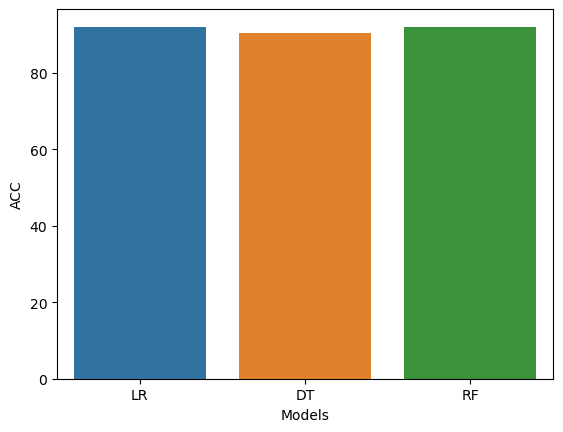

In [49]:
#plot
sns.barplot(x = 'Models',y = 'ACC', data = final_data)

In [50]:
final_data_prec = pd.DataFrame({'Models':['LR','DT','RF'],
             "PRE":[precision_score(y_test,y_pred1)*100,
                    precision_score(y_test,y_pred2)*100,
                    precision_score(y_test,y_pred3)*100,
                   ]})

In [51]:
final_data_prec

,Models,PRE
0,LR,93.069307
1,DT,88.888889
2,RF,93.069307


<Axes: xlabel='Models', ylabel='PRE'>

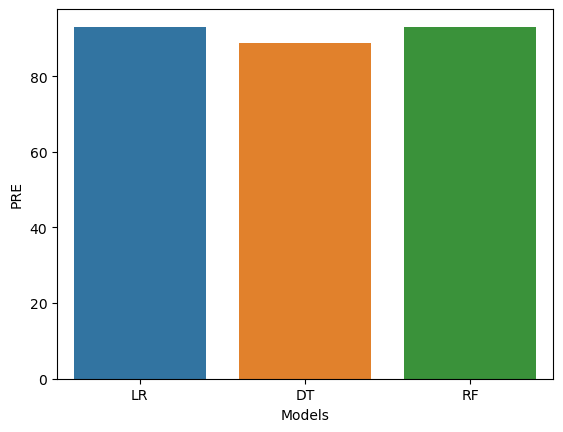

In [52]:
#plot
sns.barplot(x = 'Models',y = 'PRE', data = final_data_prec)

In [53]:
final_data_f1 = pd.DataFrame({'Models':['LR','DT','RF'],
             "F1":[f1_score(y_test,y_pred1)*100,
                    f1_score(y_test,y_pred2)*100,
                    f1_score(y_test,y_pred3)*100,
                   ]})

In [54]:
final_data_f1

,Models,F1
0,LR,92.610837
1,DT,91.428571
2,RF,92.610837


<Axes: xlabel='Models', ylabel='F1'>

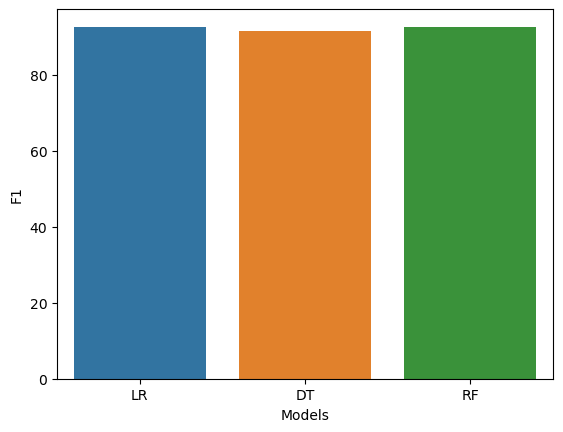

In [55]:
#plot
sns.barplot(x = 'Models',y = 'F1', data = final_data_f1)

In [56]:
final_data_re = pd.DataFrame({'Models':['LR','DT','RF'],
             "Recall":[recall_score(y_test,y_pred1)*100,
                    recall_score(y_test,y_pred2)*100,
                    recall_score(y_test,y_pred3)*100,
                   ]})

In [58]:
final_data_re

,Models,Recall
0,LR,92.156863
1,DT,94.117647
2,RF,92.156863


* Using Logistic Regression

In [60]:
#train the model in the whole dataset
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

######  Save The Model

In [61]:
#Import library
import joblib

In [63]:
#save the model
joblib.dump(LR,'Credit Card Fraud Detection Model')

['Credit Card Fraud Detection Model']

In [64]:
##making predicton with the model

model = joblib.load('Credit Card Fraud Detection Model')

In [66]:
prediction = model.predict([[1,1,0,1,1,1,1,0,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])

In [67]:
if prediction==0:
    print("Normal Transaction")
else:
        print("Fraudulent Transaction")

Normal Transaction


In [ ]:
from tkinter import *
import joblib

def show_entry_fields():
    v1=float(e1.get())
    v2=float(e2.get())
    v3=float(e3.get())
    v4=float(e4.get())
    v5=float(e5.get())
    v6=float(e6.get())
    v7=float(e7.get())
    v8=float(e8.get())
    v9=float(e9.get())
    v10=float(e10.get())
    v11=float(e11.get())
    v12=float(e12.get())
    v13=float(e13.get())
    v14=float(e14.get())
    v15=float(e15.get())
    v16=float(e16.get())
    v17=float(e17.get())
    v18=float(e18.get())
    v19=float(e19.get())
    v20=float(e20.get())
    v21=float(e21.get())
    v22=float(e22.get())
    v23=float(e23.get())
    v24=float(e24.get())
    v25=float(e25.get())
    v26=float(e26.get())
    v27=float(e27.get())
    v28=float(e28.get())
    v29=float(e29.get())
  

    model = joblib.load('Credit Card Fraud Detection Model')
    y_pred = model.predict([[v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,
                            v21,v22,v23,v24,v25,v26,v27,v28,v29]])
    list1 = [v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,
                            v21,v22,v23,v24,v25,v26,v27,v28,v29]
    
    result = []
    if y_pred ==0:
        result.append("Normal Transaction")
    else:
        result.append("Fraudulent Transaction")
    print("") 
    print("Credit Card Fraud Detection System",result)
    print("")
    
    Label(master,text="Final Prediction From The Model-Credit Card Fraud Detection System")
    Label(master,text=result).grid(row=32)
    
    
master = Tk()
master.title("Credit Card Fraud Detection System")

label = Label(master,text='Credit Card Fraud Detection System'
             , bg = 'black',fg='white', width = 30).grid(row=32)


Label(master,text='Enter value of V1').grid(row=1)
Label(master,text='Enter value of V2').grid(row=2)
Label(master,text='Enter value of V3').grid(row=3)
Label(master,text='Enter value of V4').grid(row=4)
Label(master,text='Enter value of V5').grid(row=5)
Label(master,text='Enter value of V6').grid(row=6)

Label(master,text='Enter value of V7').grid(row=7)
Label(master,text='Enter value of V8').grid(row=8)
Label(master,text='Enter value of V9').grid(row=9)
Label(master,text='Enter value of V10').grid(row=10)
Label(master,text='Enter value of V11').grid(row=11)
Label(master,text='Enter value of V12').grid(row=12)

Label(master,text='Enter value of V13').grid(row=13)
Label(master,text='Enter value of V14').grid(row=14)
Label(master,text='Enter value of V15').grid(row=15)
Label(master,text='Enter value of V16').grid(row=16)
Label(master,text='Enter value of V17').grid(row=17)
Label(master,text='Enter value of V18').grid(row=18)

Label(master,text='Enter value of V19').grid(row=19)
Label(master,text='Enter value of V20').grid(row=20)
Label(master,text='Enter value of V21').grid(row=21)
Label(master,text='Enter value of V22').grid(row=22)
Label(master,text='Enter value of V23').grid(row=23)
Label(master,text='Enter value of V24').grid(row=24)

Label(master,text='Enter value of V25').grid(row=25)
Label(master,text='Enter value of V26').grid(row=26)
Label(master,text='Enter value of V27').grid(row=27)
Label(master,text='Enter value of V28').grid(row=28)
Label(master,text='Enter value of V29').grid(row=29)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)

e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18 = Entry(master)

e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23 = Entry(master)
e24 = Entry(master)

e25 = Entry(master)
e26 = Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29 = Entry(master)

e1.grid(row = 1,column = 1)
e2.grid(row = 2,column = 1)
e3.grid(row = 3,column = 1)
e4.grid(row = 4,column = 1)
e5.grid(row = 5,column = 1)
e6.grid(row = 6,column = 1)

e7.grid(row = 7,column = 1)
e8.grid(row = 8,column = 1)
e9.grid(row = 9,column = 1)
e10.grid(row = 10,column = 1)
e11.grid(row = 11,column = 1)
e12.grid(row = 12,column = 1)

e13.grid(row = 13,column = 1)
e14.grid(row = 14,column = 1)
e15.grid(row = 15,column = 1)
e16.grid(row = 16,column = 1)
e17.grid(row = 17,column = 1)
e18.grid(row = 18,column = 1)

e19.grid(row = 19,column = 1)
e20.grid(row = 20,column = 1)
e21.grid(row = 21,column = 1)
e22.grid(row = 22,column = 1)
e23.grid(row = 23,column = 1)
e24.grid(row = 24,column = 1)

e25.grid(row = 25,column = 1)
e26.grid(row = 26,column = 1)
e27.grid(row = 27,column = 1)
e28.grid(row = 28,column = 1)
e29.grid(row = 29,column = 1)


Button(master,text = "Predict",command = show_entry_fields).grid()

mainloop()



Credit Card Fraud Detection System ['Fraudulent Transaction']


Credit Card Fraud Detection System ['Fraudulent Transaction']


Credit Card Fraud Detection System ['Normal Transaction']

